In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas_datareader as pdr
key = "4412be54f9ecbfe7303a63f224bb63e7d0474e30"

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')

In [4]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-06-26 00:00:00+00:00,126.750,127.99,126.51,127.67,44066841,116.803091,117.945780,116.581926,117.650893,44066841,0.0,1.0
1,AAPL,2015-06-29 00:00:00+00:00,124.530,126.47,124.48,125.46,49161427,114.757309,116.545065,114.711233,115.614326,49161427,0.0,1.0
2,AAPL,2015-06-30 00:00:00+00:00,125.425,126.12,124.86,125.57,44370682,115.582073,116.222531,115.061412,115.715694,44370682,0.0,1.0
3,AAPL,2015-07-01 00:00:00+00:00,126.600,126.94,125.99,126.90,30238811,116.664863,116.978181,116.102733,116.941320,30238811,0.0,1.0
4,AAPL,2015-07-02 00:00:00+00:00,126.440,126.69,125.77,126.43,27210952,116.517419,116.747800,115.899998,116.508204,27210952,0.0,1.0


In [5]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-06-17 00:00:00+00:00,351.59,355.40,351.0900,355.150,28601626,351.59,355.40,351.0900,355.150,28601626,0.0,1.0
1253,AAPL,2020-06-18 00:00:00+00:00,351.73,353.45,349.2200,351.410,24205096,351.73,353.45,349.2200,351.410,24205096,0.0,1.0
1254,AAPL,2020-06-19 00:00:00+00:00,349.72,356.56,345.1500,354.635,66118952,349.72,356.56,345.1500,354.635,66118952,0.0,1.0
1255,AAPL,2020-06-22 00:00:00+00:00,358.87,359.46,351.1500,351.340,33861316,358.87,359.46,351.1500,351.340,33861316,0.0,1.0
1256,AAPL,2020-06-23 00:00:00+00:00,366.53,372.38,362.2701,364.000,53038869,366.53,372.38,362.2701,364.000,53038869,0.0,1.0


In [6]:
df.head(1)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-06-26 00:00:00+00:00,126.75,127.99,126.51,127.67,44066841,116.803091,117.94578,116.581926,117.650893,44066841,0.0,1.0


In [7]:
df.tail(100)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1157,AAPL,2020-01-31 00:00:00+00:00,309.51,322.68,308.2900,320.930,49897096,307.952855,321.056597,306.738993,319.315401,49897096,0.0,1.0
1158,AAPL,2020-02-03 00:00:00+00:00,308.66,313.49,302.2200,304.300,43496401,307.107132,311.912832,300.699531,302.769067,43496401,0.0,1.0
1159,AAPL,2020-02-04 00:00:00+00:00,318.85,319.64,313.6345,315.310,34154134,317.245866,318.031891,312.056605,313.723676,34154134,0.0,1.0
1160,AAPL,2020-02-05 00:00:00+00:00,321.45,324.76,318.9500,323.520,29706718,319.832785,323.126133,317.345363,321.892371,29706718,0.0,1.0
1161,AAPL,2020-02-06 00:00:00+00:00,325.21,325.22,320.2648,322.570,26356385,323.573869,323.583818,318.653548,320.947150,26356385,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AAPL,2020-06-17 00:00:00+00:00,351.59,355.40,351.0900,355.150,28601626,351.590000,355.400000,351.090000,355.150000,28601626,0.0,1.0
1253,AAPL,2020-06-18 00:00:00+00:00,351.73,353.45,349.2200,351.410,24205096,351.730000,353.450000,349.220000,351.410000,24205096,0.0,1.0
1254,AAPL,2020-06-19 00:00:00+00:00,349.72,356.56,345.1500,354.635,66118952,349.720000,356.560000,345.150000,354.635000,66118952,0.0,1.0
1255,AAPL,2020-06-22 00:00:00+00:00,358.87,359.46,351.1500,351.340,33861316,358.870000,359.460000,351.150000,351.340000,33861316,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       126.750
1       124.530
2       125.425
3       126.600
4       126.440
         ...   
1252    351.590
1253    351.730
1254    349.720
1255    358.870
1256    366.530
Name: close, Length: 1257, dtype: float64

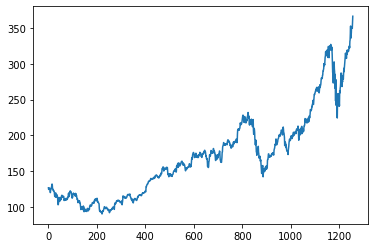

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.13182954]
 [0.12379159]
 [0.12703212]
 ...
 [0.9391361 ]
 [0.97226547]
 [1.        ]]


In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size

817

In [14]:
test_size

440

In [15]:
train_data

array([[0.13182954],
       [0.12379159],
       [0.12703212],
       [0.13128643],
       [0.13070712],
       [0.12911402],
       [0.1279916 ],
       [0.11669503],
       [0.10764329],
       [0.11926572],
       [0.12788298],
       [0.12770194],
       [0.13208299],
       [0.13820196],
       [0.14222093],
       [0.15109164],
       [0.14631232],
       [0.12628987],
       [0.12607263],
       [0.12368297],
       [0.11741917],
       [0.11962779],
       [0.11821572],
       [0.11597089],
       [0.11209674],
       [0.10174155],
       [0.08798291],
       [0.09073464],
       [0.08975705],
       [0.09116912],
       [0.10637605],
       [0.08381911],
       [0.09015533],
       [0.08982947],
       [0.09276223],
       [0.09710706],
       [0.0947174 ],
       [0.08932257],
       [0.08077773],
       [0.05583113],
       [0.04627249],
       [0.04851733],
       [0.07006047],
       [0.08175531],
       [0.08309497],
       [0.081176  ],
       [0.06292769],
       [0.079

In [16]:
import numpy
# convert array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [18]:
X_train

array([[0.13182954, 0.12379159, 0.12703212, ..., 0.09189326, 0.07965531,
        0.08629929],
       [0.12379159, 0.12703212, 0.13128643, ..., 0.07965531, 0.08629929,
        0.08454325],
       [0.12703212, 0.13128643, 0.13070712, ..., 0.08629929, 0.08454325,
        0.09757775],
       ...,
       [0.26749701, 0.26061769, 0.27126254, ..., 0.49266809, 0.4833629 ,
        0.46178355],
       [0.26061769, 0.27126254, 0.28516601, ..., 0.4833629 , 0.46178355,
        0.46308701],
       [0.27126254, 0.28516601, 0.31221261, ..., 0.46178355, 0.46308701,
        0.4635577 ]])

In [19]:
print(X_train.shape)

(716, 100)


In [20]:
print(X_test)

[[0.47231978 0.47738875 0.47098012 ... 0.28907636 0.29132119 0.28994533]
 [0.47738875 0.47098012 0.48738187 ... 0.29132119 0.28994533 0.29179188]
 [0.47098012 0.48738187 0.49024222 ... 0.28994533 0.29179188 0.29577465]
 ...
 [0.79152033 0.82316521 0.84724284 ... 0.91476882 0.94768094 0.9459068 ]
 [0.82316521 0.84724284 0.84554111 ... 0.94768094 0.9459068  0.9464137 ]
 [0.84724284 0.84554111 0.79354792 ... 0.9459068  0.9464137  0.9391361 ]]


In [21]:
print(X_test.shape)

(339, 100)


In [22]:
print(y_test.shape)

(339,)


In [23]:
print(y_train.shape)

(716,)


In [24]:
#time_step = 101
#X_train,y_train = create_dataset(train_data,time_step)
#X_test,y_test = create_dataset(test_data,time_step)

In [25]:
print(X_test.shape)

(339, 100)


In [26]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.2.0'

In [31]:
from tensorflow import keras

In [32]:
model = keras.Sequential()

In [33]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
Total params: 10,400
Trainable params: 10,400
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.add(LSTM(50,return_sequences=True))

In [36]:
model.add(LSTM(50))

In [37]:
model.add(Dense(1))